In [1232]:
from sympy import * #symbols, Function, Derivative, Eq, solve, init_printing, collect, expand, simplify, factor
init_printing()

# 1 Lowpass

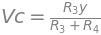

In [1233]:
Va, Vb, Vc, x, y, C1, C2, R1, R2, R3, R4, t = symbols('Va Vb Vc x y C1 C2 R1 R2 R3 R4 t')

eqA = Eq( (Va - x) / R1 + C2 * Derivative(Va-y, t) + (Va-Vb)/R2 , 0)
eqB = Eq( (Vb-Va)/R2 + C1*Derivative(Vb, t) , 0)
eqC = Eq( Vc/R3 + (Vc-y)/R4, 0)

# Solve for Va, Vb, and Vc
solutions = solve([eqA, eqB, eqC], (Va, Vb, Vc))

# Display the solutions
for var, sol in solutions.items():
    # print(f"{var}: {sol}")
    display(Eq(var, sol))

solve for Vb and Vc to get y(t)

In [1234]:
# Solve for Vb in terms of Va
Vb_expr = solve(eqB, Vb)        # is this correct?

# Solve for y in terms of Vc
y_expr = solve(eqC, y)

# Display the expressions found
Vb_expr, y_expr

</details>


# 2 Highpass xx

### isolating voltages from nodal equations

In [1235]:
# # x, y, Va, Vb, Vc = Function('x')(t), Function('y')(t), Function('Va')(t), Function('Vb')(t), Function('Vc')(t)
# x, y, Va, Vb, Vc = symbols('x y Va Vb Vc')
# C1, C2, R1, R2, R3, R4, K, t = symbols('C1 C2 R1 R2 R3 R4 K t')
# a1, a0, b2, b1, b0 = symbols('a1 a0 b2 b1 b0')
# K = 1 + R4 / R3

# # Define the nodal equations
# A_eq = Eq(-C1 * Derivative(x - Va, t) + (Va - y)/R1 + C2 * Derivative(Va - Vb, t), 0)
# B_eq = Eq(-C2 * Derivative(Va - Vb, t) + Vb/R2, 0)
# C_eq = Eq(-(y - Vc)/R4 + Vc/R3, 0)

# # Solve for Va, Vb, and Vc
# solutions = solve([A_eq, B_eq, C_eq], (Va, Vb, Vc))

# # Display the solutions using init_printing()
# for var, sol in solutions.items():
#     display(Eq(var, sol))

In [1236]:
# # Solve for Vc in terms of Vc
# C_expr = solve(C_eq, Vc)
# Vb_expr = C_expr[0]

# C_expr, Vb_expr

### inserting into equation A

In [1237]:
# # Get Va from the solved system
# Va_expr = solutions[Va]  
# Va_substituted = Va_expr.subs(Vb, Vb_expr)
# display(Va_substituted.expand().simplify())

# # TODO : this is incorrect --- we're getting 3rd order terms

# # Substitute the voltages into equation A
# A_eq_substituted = A_eq.subs(solutions).expand()
# display(A_eq_substituted.simplify())

# A_eq_collected = A_eq_substituted.lhs.collect([y, C1]) # collect isn't collecting the terms
# display(A_eq_collected.simplify())

### collecting terms

In [1238]:
# # Assuming A_eq_substituted is an equation of the form Eq(lhs, rhs)
# lhs = A_eq_substituted.lhs

# lhs = factor(lhs)

# lhs_collected = collect(lhs, [Derivative(y, t, t), Derivative(y, t), y, Derivative(x, t), x])
# # rhs_collected = collect(rhs, [Derivative(y, t, t), Derivative(y, t), y, Derivative(x, t), x])

# lhs_collected.simplify()

### coefficients

In [1239]:
# # Extract coefficients
# a1 = lhs_collected.coeff(Derivative(y, t))
# a0 = lhs_collected.coeff(y)
# b2 = lhs_collected.coeff(Derivative(x, t))
# b1 = lhs_collected.coeff(x)
# b0 = 0  # Usually zero in high-pass filters

# print("Extracted Coefficients:")
# display(Eq(symbols('a1'), a1))
# display(Eq(symbols('a0'), a0))
# display(Eq(symbols('b2'), b2))
# display(Eq(symbols('b1'), b1))
# display(Eq(symbols('b0'), b0))


# 2nd xx

In [1240]:
from sympy import symbols, solve, Eq, expand, collect, factor

# Define symbols
C1, C2, R1, R2, R3, R4, s, x, y, VA, VB, VC, K = symbols('C1 C2 R1 R2 R3 R4 s x y VA VB VC K')

# Define equations
LA = Eq(-C1*s*(x - VA) + (VA - y)/R1 + C2*s*(VA - VB), 0)
LB = Eq(-C2*s*(VA - VB) + VB/R2, 0)
LC = Eq(VC/R3 - (y - VC)/R4, 0)

display(LA)
display(LB)
display(LC)

### isolating Vb and Vc (Vb = Vc)

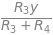

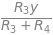

In [1241]:
# Solve for VC and substitute in VB
VC_sub = solve(LC, VC)[0] if isinstance(solve(LC, VC), list) else solve(LC, VC)
VB_val = VC_sub

display(VC_sub, VB_val)

### inserting into equation A

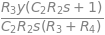

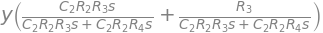

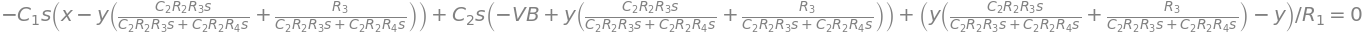

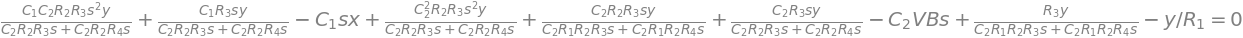

In [1242]:
LB_subs = LB.subs(VB, VB_val)
LB_subs

# Collect terms in LA
LA_collected = collect(expand(LA.lhs), [VA, s])
display(LA_collected)

# Solve for VA from LB
VA_sol = solve(LB_subs, VA)[0]
display(VA_sol)

# collect(VA_sol.expand(), y)
VA_sol = collect(VA_sol.expand(), y)
display(VA_sol)

# Substitute VA in LA and simplify
LA_substituted = LA.subs(VA, VA_sol)
display(LA_substituted)
display(LA_substituted.expand())

### collecting terms

Reformatted Equation:


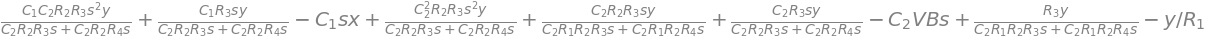

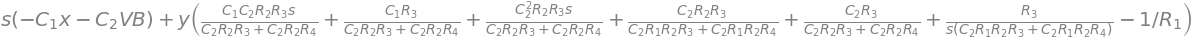

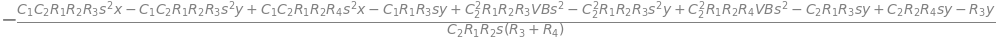

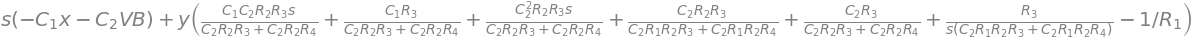

In [1243]:
# Expand the equation fully
expanded_eq = expand(LA_substituted.lhs)

# Collect terms explicitly in terms of y, s, x
# collected_eq = collect(expanded_eq, [y, s**2, s, 1])
collected_eq = collect(expanded_eq, [y, s**2, s, x, 1])

# Factor the entire expression after collection
factored_eq = factor(collected_eq)

LA_collected = collect(expanded_eq, [y, s, 1/s])

print("Reformatted Equation:")
display(expanded_eq)
display(collected_eq)
display(factored_eq)
display(LA_collected)

### extracting coefficients

Extracted Coefficients:


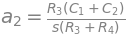

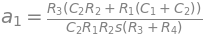

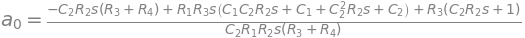

In [1244]:
# Extract coefficients in the Laplace domain
a2 = expanded_eq.coeff(s**2 * y)
a1 = expanded_eq.coeff(s * y)
a0 = expanded_eq.coeff(y)
b2 = expanded_eq.coeff(s**2 * x)
b1 = expanded_eq.coeff(s * x)
b0 = expanded_eq.coeff(x)
# b0 = expanded_eq.coeff(x) - (b1 * s)  # Remove any leftover `s` from `b1`

print("Extracted Coefficients:")
display(Eq(symbols('a2'), a2.simplify()))
display(Eq(symbols('a1'), a1.simplify()))
display(Eq(symbols('a0'), a0.simplify()))
display(Eq(symbols('b2'), b2.simplify()))
display(Eq(symbols('b1'), b1.simplify()))
display(Eq(symbols('b0'), b0.simplify()))

In [1245]:
R1_val = 0.17841e3
R2_val = 892.06e3
R3_val = 1000
R4_val = 1000
C1_val = 1784.1*10**(-9)
C2_val = 3568.2*10**(-9)
list1 = [a2, a1, a0, b2, b1, b0]

for val in list1:
    val = val.subs({R1: R1_val, R2: R2_val, R3: R3_val, R4: R4_val, C1: C1_val, C2: C2_val})
    print(val)

2.67615e-6/s
0.00280337424089736/s
2.67615e-6*s - 0.00280169273965305 + 0.000880455794914484/s
0
-1.78410000000000e-6
-1.7841e-6*s


In [1246]:
# sol1, sol2 = solve(Eq(x**2 + a1*x + a0, 0), x)
# sol1, sol2

# 3 Bandpass xx

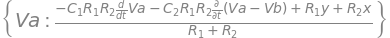

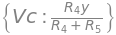

In [1247]:
Va, Vb, Vc, x, y, t, C1, C2, R1, R2, R3, R4, R5 = symbols('Va Vb Vc x y t C1 C2 R1 R2 R3 R4 R5')

eqA = Eq( -(x-Va)/R1 + (Va-y)/R2 + C2*Derivative(Va-Vb, t) + C1*Derivative(Va,t) , 0)
eqB = Eq( -C2*Derivative(Va-Vb, t) + Vb/R3 , 0)
eqC = Eq( -(y-Vc)/R5 + Vc/R4, 0)

# Solve for Va, Vb, and Vc
sola = solve([eqA], (Va))
solb = solve([eqB], (Vb))
solc = solve([eqC], (Vc))

display(sola)
display(solb)
display(solc)

In [1248]:
# Solve for y in terms of Vc
y_expr = solve(eqC, y)
y_expr

In [1249]:
Vb_expr = solve(eqB, Vb)[0]
display(Vb_expr)

In [1250]:
eqA_updated = eqA.subs(Vb, Vb_expr)  # Insert Vb into equation A
display(eqA_updated)

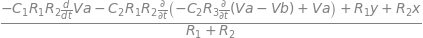

In [1251]:
sola[Va].subs(Vb, Vb_expr)

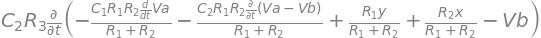

In [1252]:
Vb_expr = Vb_expr.subs(Va, sola[Va])
Vb_expr = expand(Vb_expr)  # Ensure terms don’t collapse improperly
display(Vb_expr)

In [1253]:
# Vb_expr = Vb_expr.subs(Va, sola[Va])  # Replace Va with its expression in terms of y
Vb_expr.simplify()